Juan de Dios Romero Palop


AFI - Master  en Data Science y Big Data


12/05/22

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm

Generamos el dataset de prueba que vamos a utilizar. Es un dataset con 1000 observaciones y desbalanceado (95%-5%).

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                             n_clusters_per_class=2, weights=[0.95,0.05], flip_y=0.01, class_sep=0.3, 
                             hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Lo visualizamos

([], [])

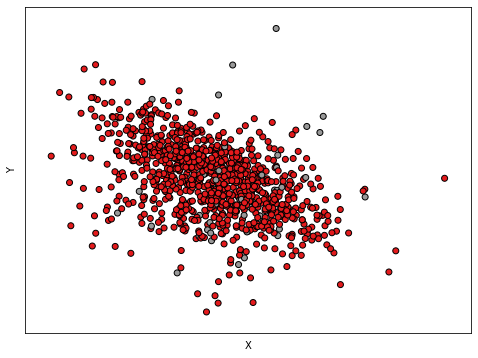

In [5]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Vamos a utilizar una SVM como ejemplo. Queremos saber qué kernel y qué penalty funcionan mejor en nuestro problema dependiendo de la métrica a optimizar. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [6]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.1, 1, 100],
                     'kernel': ['linear','rbf']
                    }]

tuned_parameters_2 = [{'C': [0.1, 1, 100],
                     'kernel': ['linear','rbf'],
                     'class_weight': ['balanced']
                    }]

scores = ['accuracy','precision', 'recall','f1','roc_auc']

In [7]:
from sklearn.model_selection import GridSearchCV
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=3, n_jobs=None, scoring=score)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.942 (+/-0.003) for {'C': 0.1, 'kernel': 'linear'}
0.942 (+/-0.003) for {'C': 0.1, 'kernel': 'rbf'}
0.942 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
0.942 (+/-0.003) for {'C': 1, 'kernel': 'rbf'}
0.942 (+/-0.003) for {'C': 100, 'kernel': 'linear'}
0.945 (+/-0.006) for {'C': 100, 'kernel': 'rbf'}
# Tuning hyper-parameters for precision



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'C': 0.1, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 0.1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
0.833 (+/-0.471) for {'C': 100, 'kernel': 'rbf'}
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'C': 0.1, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 0.1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'linear'}
0.000 (+/-0.000) for {'C': 1, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
0.087 (+/-0.052) for {'C': 100, 'kernel': 'rbf'}
# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.0

In [8]:
from sklearn.model_selection import GridSearchCV
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters_2, cv=3, n_jobs=None, scoring=score)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}

Grid scores on development set:

0.513 (+/-0.016) for {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.557 (+/-0.032) for {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.516 (+/-0.024) for {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.607 (+/-0.045) for {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.518 (+/-0.030) for {'C': 100, 'class_weight': 'balanced', 'kernel': 'linear'}
0.675 (+/-0.045) for {'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}

Grid scores on development set:

0.077 (+/-0.011) for {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.095 (+/-0.013) for {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.077 (+/-0.012) for 